In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [2]:
df=pd.read_csv('/content/avila-tr.txt',sep=',',header=None)

In [3]:
df.columns =['A', 'B', 'C', 'D','E','F','G','H','I','J','target']

In [4]:
df.head()

,A,B,C,D,E,F,G,H,I,J,target
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [5]:
df.shape

(10430, 11)

In [6]:
df.dtypes

A         float64
B         float64
C         float64
D         float64
E         float64
F         float64
G         float64
H         float64
I         float64
J         float64
target     object
dtype: object

In [7]:
df.isna().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
target    0
dtype: int64

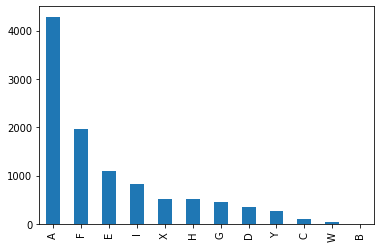

In [8]:
df['target'].value_counts().plot(kind="bar")

In [9]:
val = df.target.value_counts()

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,A,B,C,D,E,F,G,H,I,J
A,1.00,-0.04,0.03,-0.07,0.45,-0.04,-0.00,-0.04,0.06,-0.00
B,-0.04,1.00,0.41,0.00,-0.07,0.42,0.58,0.04,0.35,-0.02
C,0.03,0.41,1.00,0.14,0.01,0.13,0.29,0.03,0.19,-0.05
D,-0.07,0.00,0.14,1.00,0.10,0.26,0.04,0.34,0.28,0.32
E,0.45,-0.07,0.01,0.10,1.00,0.04,0.03,-0.07,0.27,0.15
F,-0.04,0.42,0.13,0.26,0.04,1.00,0.46,-0.06,0.21,0.76
G,-0.00,0.58,0.29,0.04,0.03,0.46,1.00,0.00,0.27,0.26
H,-0.04,0.04,0.03,0.34,-0.07,-0.06,0.00,1.00,0.49,-0.02
I,0.06,0.35,0.19,0.28,0.27,0.21,0.27,0.49,1.00,0.19
J,-0.00,-0.02,-0.05,0.32,0.15,0.76,0.26,-0.02,0.19,1.00


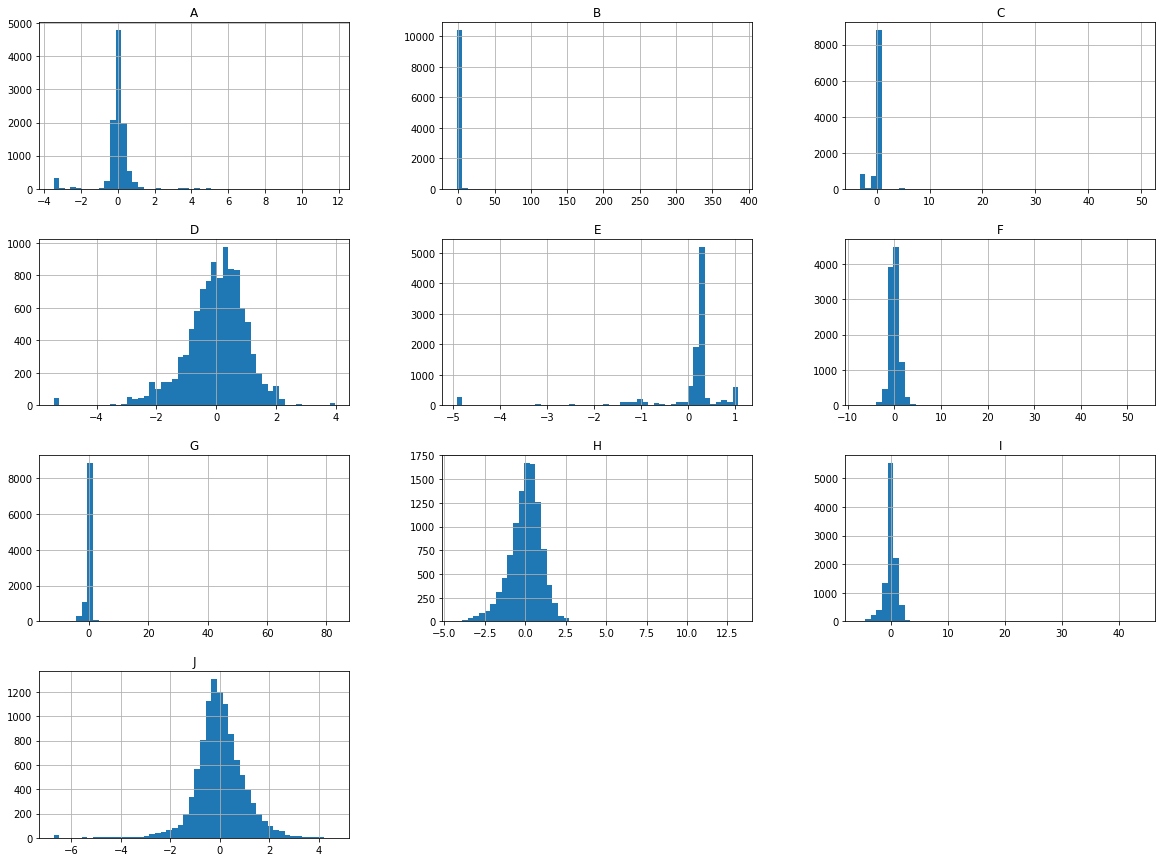

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [12]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

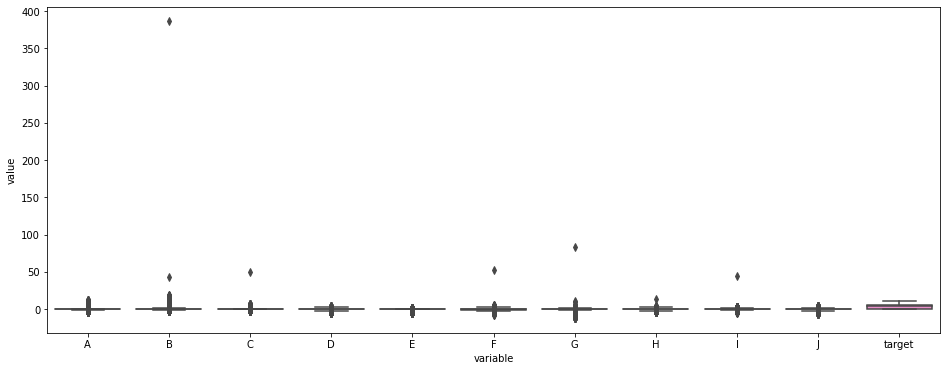

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df),ax=ax)
plt.show()

In [14]:
standard_deviations = 3
df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

,A,B,C,D,E,F,G,H,I,J,target
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,5
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,5
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,0
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,4


In [15]:
data = df.copy()

In [16]:
input = df.loc[:, df.columns != 'target']
output= df['target'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,output,test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, random_state=42)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [17]:
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, target_names=val.keys()))
print(classification_report(y_train, y_pred_train, target_names=val.keys()))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       830
           F       1.00      1.00      1.00         2
           E       1.00      1.00      1.00        27
           I       1.00      1.00      1.00        62
           X       0.99      0.99      0.99       220
           H       1.00      0.98      0.99       417
           G       0.99      0.94      0.96        81
           D       0.96      0.95      0.95       115
           Y       1.00      1.00      1.00       173
           C       1.00      1.00      1.00         5
           W       1.00      0.99      1.00       102
           B       1.00      1.00      1.00        52

    accuracy                           0.99      2086
   macro avg       0.99      0.99      0.99      2086
weighted avg       0.99      0.99      0.99      2086

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      3456
           F       1.00 

In [19]:
y_prob_test = list(forest.predict_proba(X_test))
y_prob_train = list(forest.predict_proba(X_train))

In [20]:
y_prob_train.extend(y_prob_test)
prob_class = list(val.keys())

In [21]:
new_class = []
for prob in y_prob_train:
    str1 = str(round(prob[0],1))+'-'+prob_class[0]+"-"+str(round(prob[1],1))+"-"+prob_class[1]
    new_class.append(str1)

In [22]:
data['new_class'] = new_class

data.head()

,A,B,C,D,E,F,G,H,I,J,target,new_class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0,1.0-A-0.0-F
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0,0.0-A-0.0-F
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0,1.0-A-0.0-F
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0,0.1-A-0.0-F
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5,1.0-A-0.0-F


In [23]:
def evaluate(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(x_train)))
    print("Train classification report")
    print(classification_report(y_train, model.predict(x_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(x_test)))
    print("Test classification report")
    print(classification_report(y_test, model.predict(x_test)))


In [24]:
data.drop('target',axis=1,inplace=True)

for col_name in data.columns:
    if(data[col_name].dtype == 'object'):
        data[col_name]= data[col_name].astype('category')
        data[col_name] = data[col_name].cat.codes

data.head()

,A,B,C,D,E,F,G,H,I,J,new_class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,14
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,14
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,4
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,14


In [25]:
x = data.loc[:, data.columns != 'new_class']
y= data['new_class']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled,y,test_size=0.80,random_state=0)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [26]:
from sklearn.metrics import confusion_matrix
test_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test, test_pred)

cm

array([[3557,    0,    0,    0,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [1004,    0,    0,    0,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 191,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  55,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  25,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  19,    0,    0,    0,    0,

In [27]:
print(classification_report(y_test, test_pred))


              precision    recall  f1-score   support

           0       0.43      1.00      0.60      3560
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.30      0.00      0.01      1007
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00       191
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        59
          12       0.00      0.00      0.00       217
          13       0.00      0.00      0.00      1048
          14       0.00      0.00      0.00      2133

    accuracy                           0.43      8344
   macro avg       0.05      0.07      0.04      8344
weighted avg       0.22   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  UserWarning,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)

In [30]:
evaluate(grid_search.best_estimator_)

Train Accuracy : 0.44726749760306805
Train Confusion Matrix:
[[933   0   0   0   0   0   0   0   0   0   0]
 [283   0   0   0   0   0   0   0   0   0   0]
 [ 55   0   0   0   0   0   0   0   0   0   0]
 [ 13   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0]
 [ 54   0   0   0   0   0   0   0   0   0   0]
 [229   0   0   0   0   0   0   0   0   0   0]
 [490   0   0   0   0   0   0   0   0   0   0]]
Train classification report
              precision    recall  f1-score   support

           0       0.45      1.00      0.62       933
           4       0.00      0.00      0.00       283
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         3
          10  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [34]:
import tabulate
conclusion = [['Model', 'Precision','Recall', 'F1score', 'Accuracy'],
              ['RandomForest', 0.99, 0.99, 0.99, 0.99],
              ['DecisionTree', 0.05, 0.07 ,0.04, 0.43],
              ['DecisionTree after hyperparamter tunning', 0.03, 0.07 ,0.04, 0.43]
]
print(tabulate.tabulate(conclusion, tablefmt='fancy_grid'))


╒══════════════════════════════════════════╤═══════════╤════════╤═════════╤══════════╕
│ Model                                    │ Precision │ Recall │ F1score │ Accuracy │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ RandomForest                             │ 0.99      │ 0.99   │ 0.99    │ 0.99     │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ DecisionTree                             │ 0.05      │ 0.07   │ 0.04    │ 0.43     │
├──────────────────────────────────────────┼───────────┼────────┼─────────┼──────────┤
│ DecisionTree after hyperparamter tunning │ 0.03      │ 0.07   │ 0.04    │ 0.43     │
╘══════════════════════════════════════════╧═══════════╧════════╧═════════╧══════════╛


In [35]:
Rf=[0.99, 0.99, 0.99, 0.99]
DT= [ 0.05, 0.07 ,0.04, 0.43]
DT_tune=[0.03, 0.07 ,0.04, 0.43]

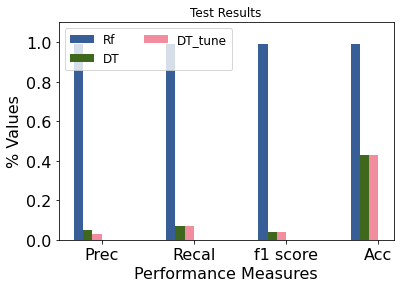

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import numpy as np


width = 0.1

r1 = np.arange(4)
r4 = [i + width for i in r1]
r5 = [i + width for i in r4]

plt.bar(r1, Rf, color='#375e97', width=width, label='Rf')


plt.bar(r4, DT, color='#3f681c', width=width, label='DT')
plt.bar(r5, DT_tune, color='#f18d9e', width=width, label='DT_tune')

plt.ylim(top=1.1)  # adjust the top leaving bottom unchanged
plt.xlabel('Performance Measures', fontsize=16)
plt.ylabel('% Values', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.title('Test Results')

plt.xticks([r + 2.5*width for r in range(4)], [ 'Prec', 'Recal','f1 score','Acc'])

plt.legend(loc=2 , ncol=2, fontsize=12)
plt.show()

plt.savefig("output.jpg")